# Name : Akshay Naik


## Task 3 - To explore unsupervised Machine Learning.
## Using 'Iris' dataset we'll explore unsupervised Machine Learning using k-means clustering and create the possible clusters from the dataset.



#### Importing libraries

In [1]:
import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [2]:
#Redaing the data.

df = pd.read_csv('Iris.csv')
df.head()
# Supervised learning data
# X and y

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Checking for value counts.

df.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [4]:
#Dropping 'Species' as this varaible is not important for clustering.

df.drop('Species', axis =1, inplace = True)

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [6]:
#Reading dataframe with IDs.

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [7]:
feature = df.columns[1:]
for i in enumerate(feature):
    print(i)

(0, 'SepalLengthCm')
(1, 'SepalWidthCm')
(2, 'PetalLengthCm')
(3, 'PetalWidthCm')


## EDA

In your assignment please perfom more EDA than what I have done over here

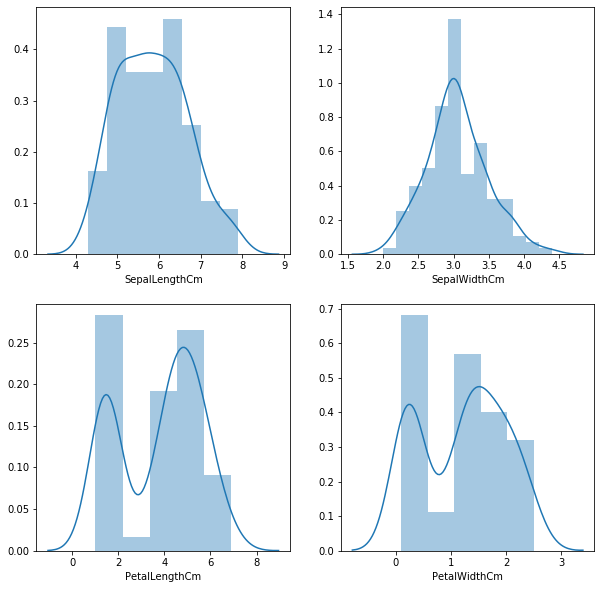

In [8]:
plt.figure(figsize = (10,10))
feature = df.columns[1:]
for i in enumerate(feature):
    plt.subplot(2,2, i[0]+1)
    sns.distplot(df[i[1]])

I will use Petal_length and petal_width for cluster profiling.

## Outlier Treatment

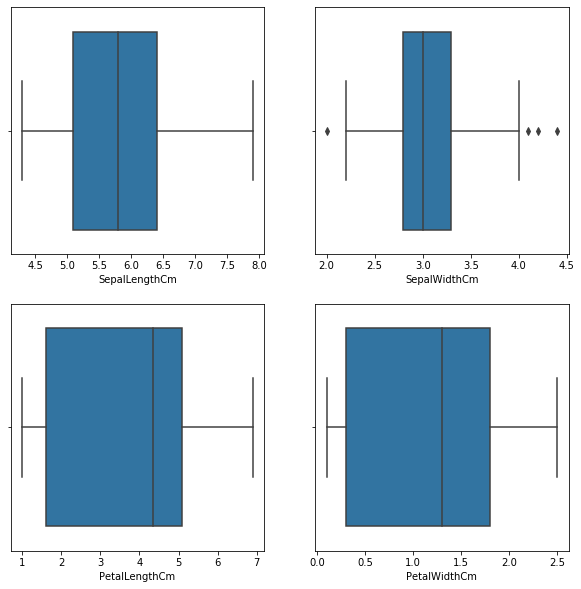

In [9]:
plt.figure(figsize = (10,10))
feature = df.columns[1:]
for i in enumerate(feature):
    plt.subplot(2,2, i[0]+1)
    sns.boxplot(df[i[1]])

In [10]:
# capping

q1 = df['SepalWidthCm'].quantile(0.01)
q4 = df['SepalWidthCm'].quantile(0.99)

df['SepalWidthCm'][df['SepalWidthCm']<= q1] = q1
df['SepalWidthCm'][df['SepalWidthCm']>= q4] = q4

## Clustering

In [11]:
# Check the hopkins

#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [12]:
hopkins(df.drop('Id', axis = 1))

0.784682866918041

## Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = scaler.fit_transform(df.drop('Id', axis = 1))
df1

array([[-9.00681170e-01,  1.05447769e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.25943021e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.46225265e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.10141122e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.29056183e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.99881426e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.18393550e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.18393550e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.62027163e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.10141122e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.52664598e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.18393550e-01, -1.22754100e+00,
      

In [14]:
df1 = pd.DataFrame(df1, columns = df.columns[1:])
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.054478,-1.341272,-1.312977
1,-1.143017,-0.125943,-1.341272,-1.312977
2,-1.385353,0.346225,-1.398138,-1.312977
3,-1.506521,0.110141,-1.284407,-1.312977
4,-1.021849,1.290562,-1.341272,-1.312977


## K-Mean Clustering

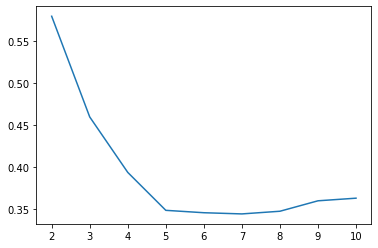

In [15]:
# Choose the value of K
# Silhouette score
# Elbow curve-ssd

from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])

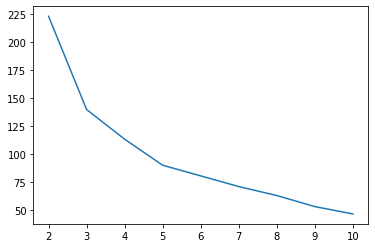

In [61]:
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])

In [16]:
# K=3
# Final Kmean Clustering

kmean = KMeans(n_clusters = 3, random_state = 50)
kmean.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [17]:
df_kmean = df.copy()

In [18]:
label  = pd.DataFrame(kmean.labels_, columns= ['label'])
label.head()

,label
0,0
1,0
2,0
3,0
4,0


In [19]:
df_kmean = pd.concat([df_kmean, label], axis =1)
df_kmean.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,label
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [20]:
#Counts for each cluster.

df_kmean.label.value_counts()

2    53
0    50
1    47
Name: label, dtype: int64

### Visualising the clusters

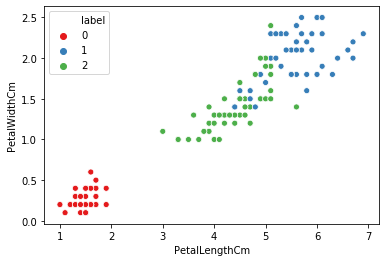

In [21]:
# Plot the cluster
sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', hue = 'label', data = df_kmean, palette = 'Set1')

### Cluster Profiling

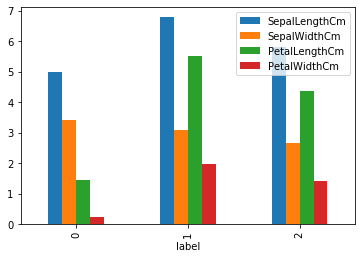

In [22]:
# Making sense out of the clsuters
df_kmean.drop('Id', axis = 1).groupby('label').mean().plot(kind = 'bar')

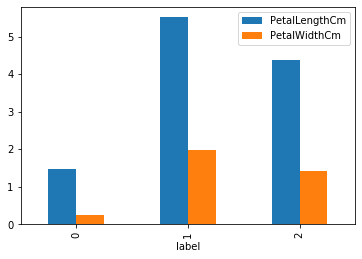

In [23]:


df_kmean.drop(['Id', 'SepalLengthCm', 'SepalWidthCm'], axis = 1).groupby('label').mean().plot(kind = 'bar')

This is how the clusterig works using k-Means algorithm.